In [1]:
# Import many dataFrame for the Algorithm Comparison:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from random import randint
from scipy import stats
import glob
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

14


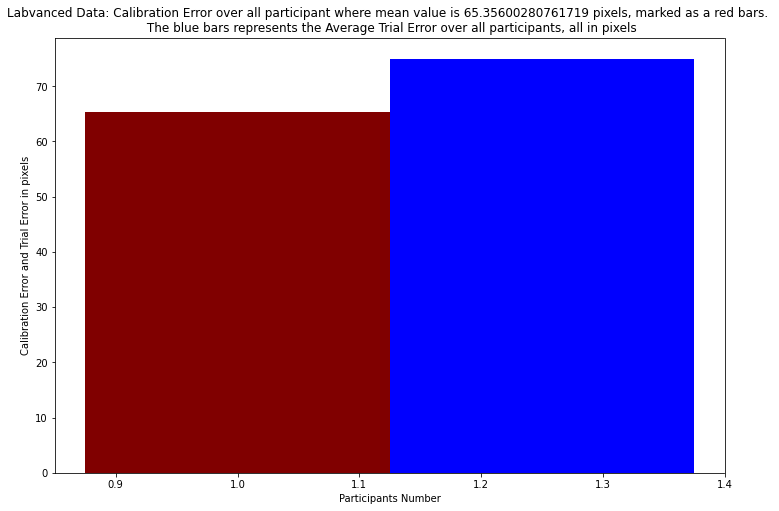

<Figure size 720x504 with 0 Axes>

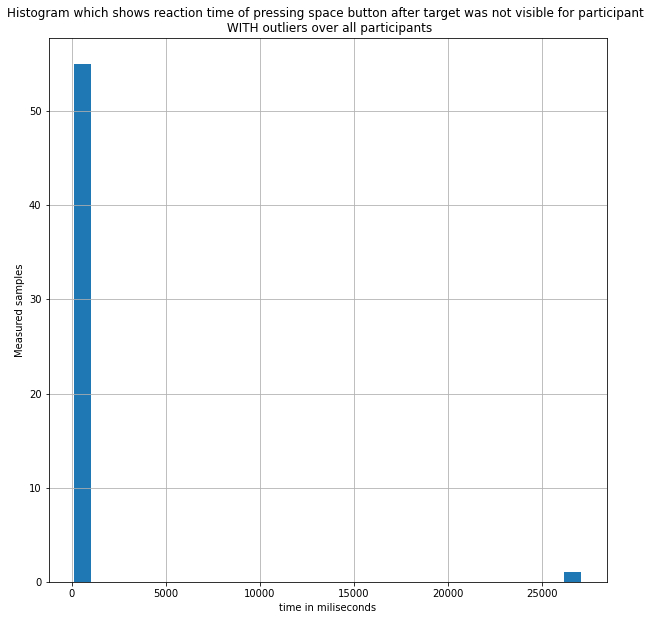

<Figure size 720x504 with 0 Axes>

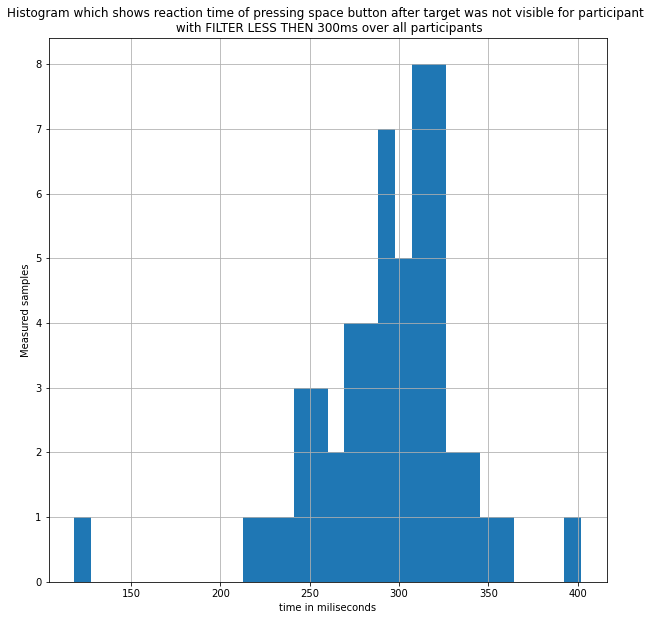

14


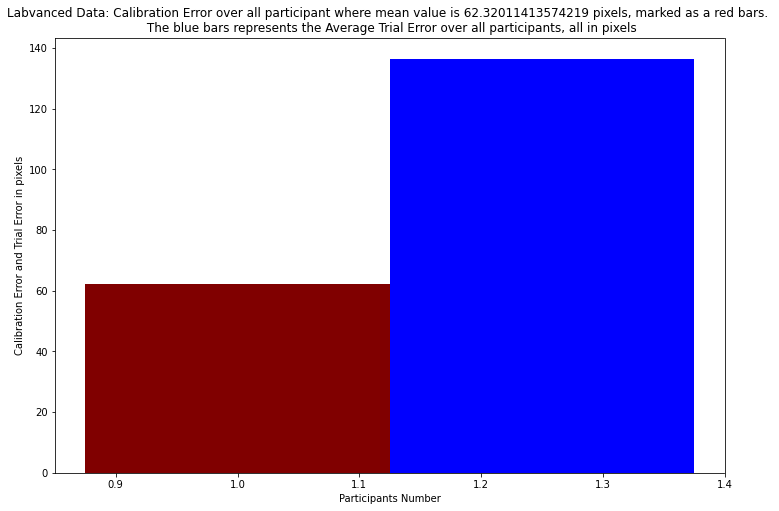

<Figure size 720x504 with 0 Axes>

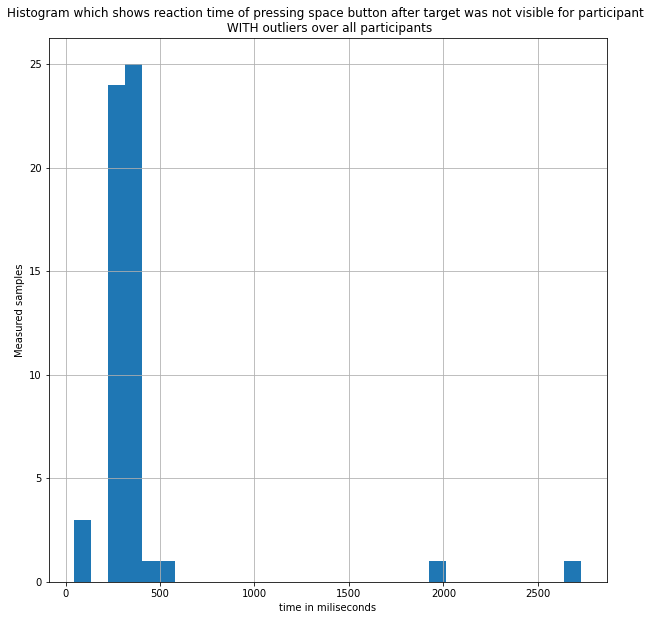

<Figure size 720x504 with 0 Axes>

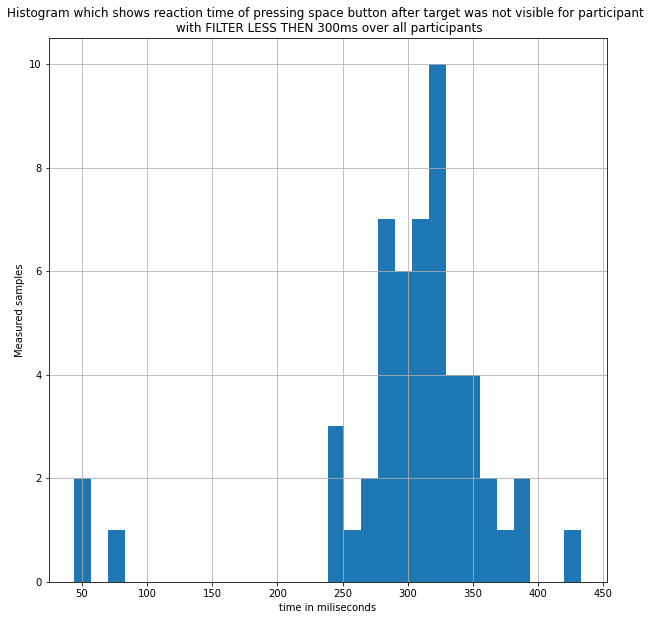

14


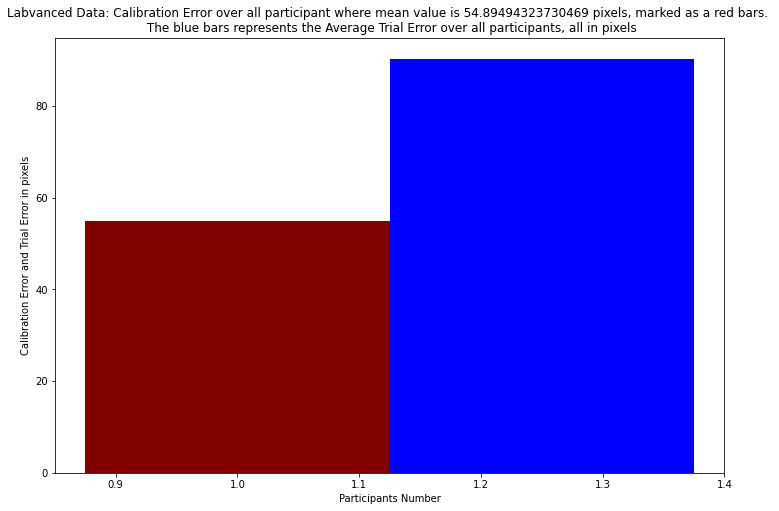

<Figure size 720x504 with 0 Axes>

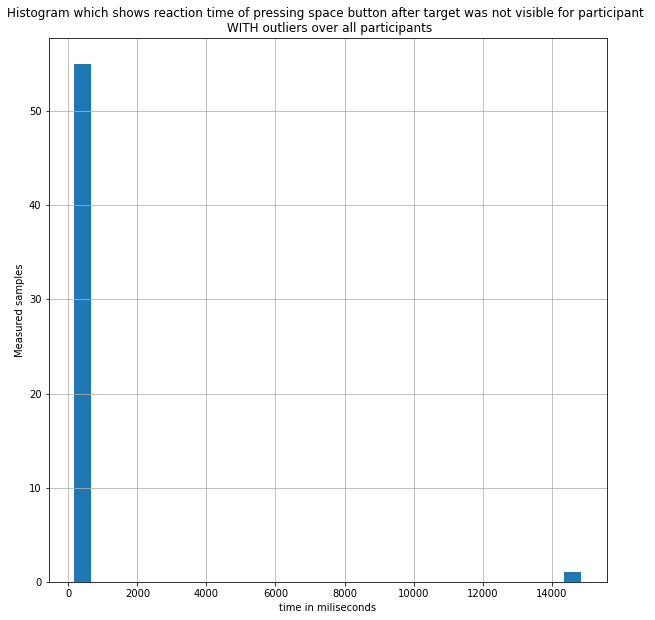

<Figure size 720x504 with 0 Axes>

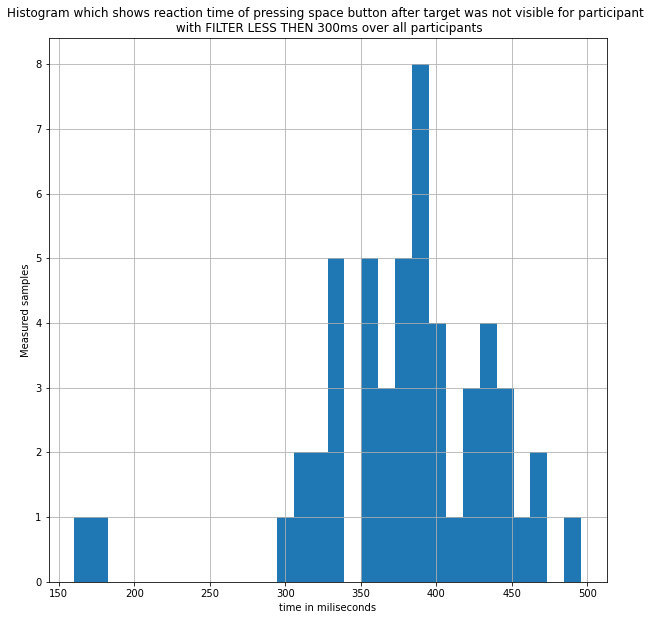

14


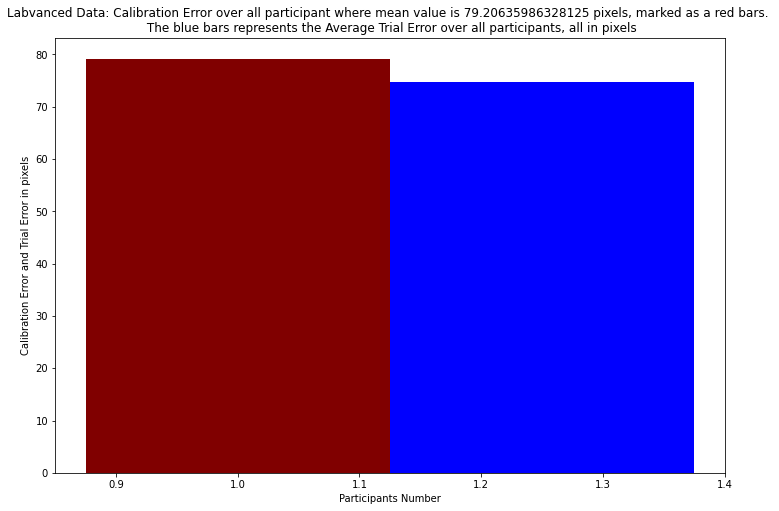

<Figure size 720x504 with 0 Axes>

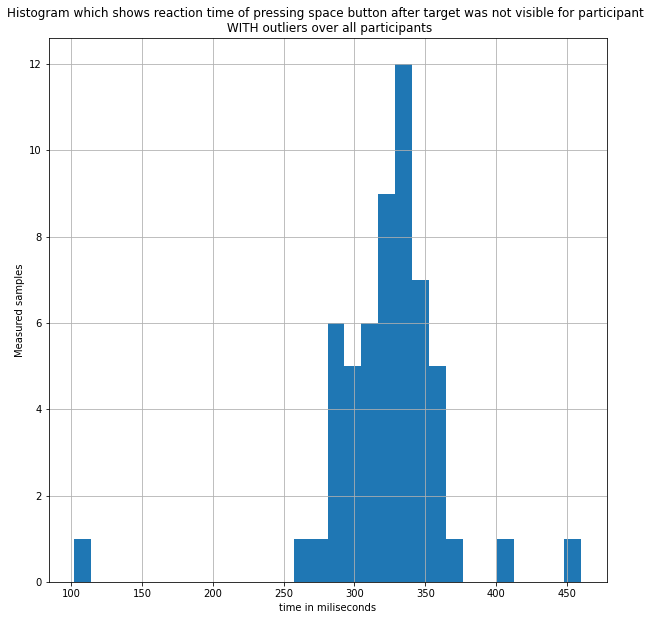

<Figure size 720x504 with 0 Axes>

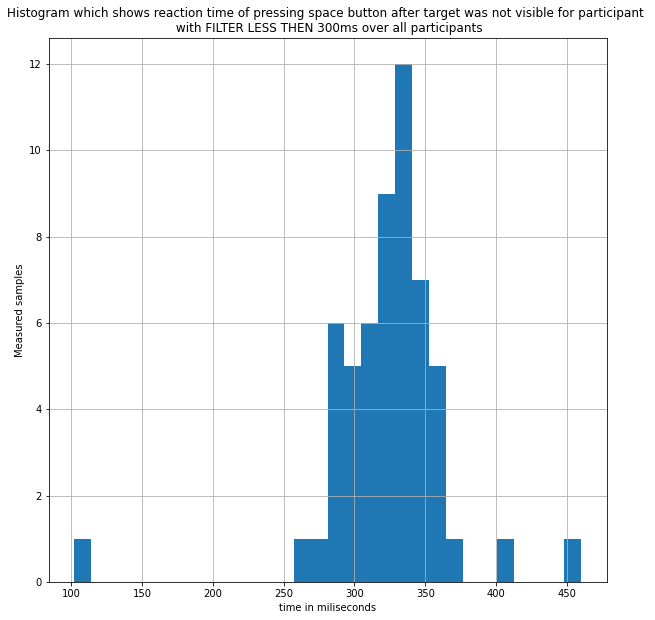

14


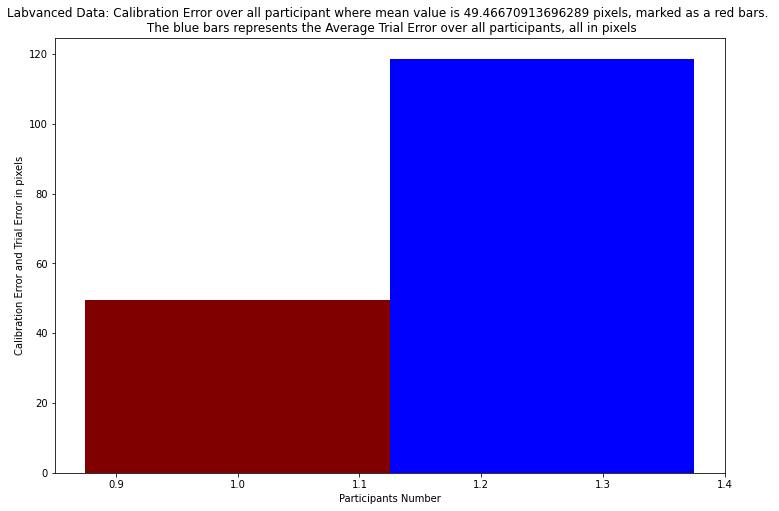

<Figure size 720x504 with 0 Axes>

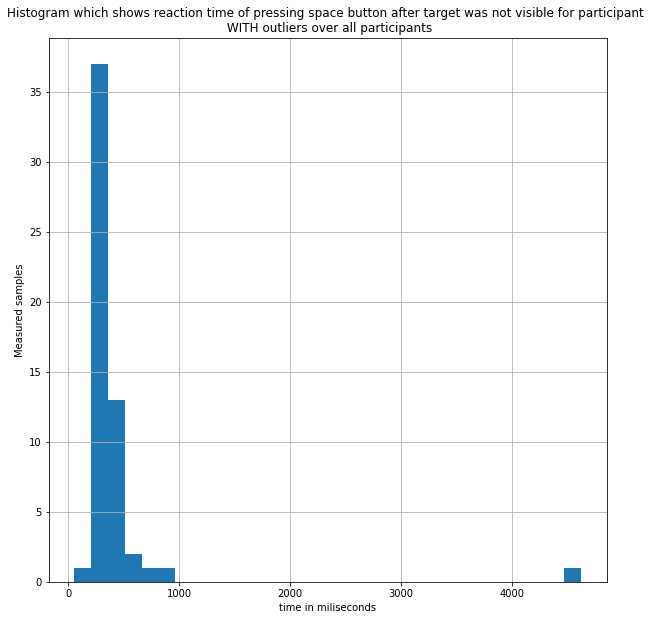

<Figure size 720x504 with 0 Axes>

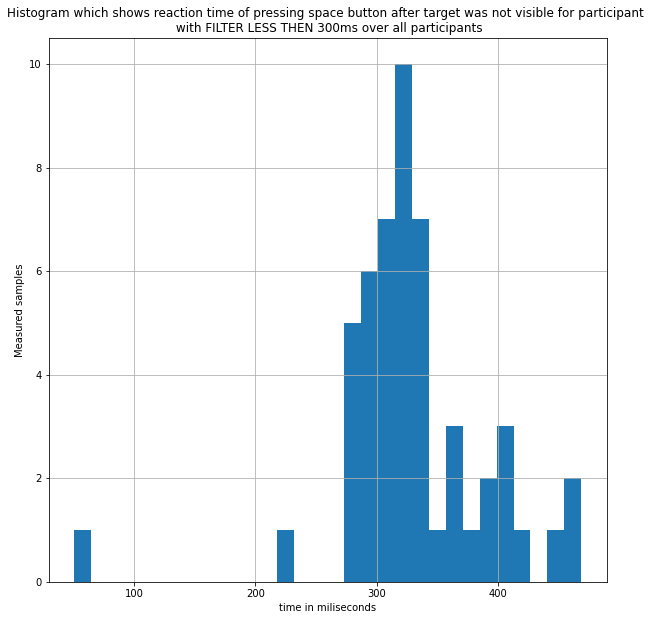

14


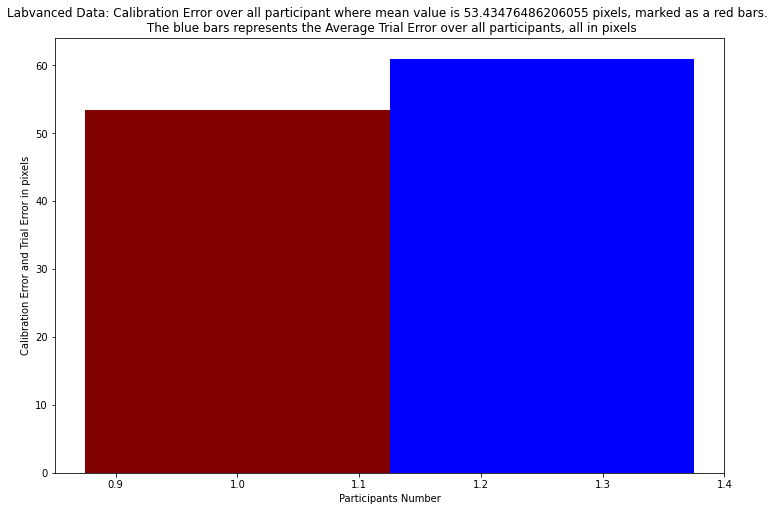

<Figure size 720x504 with 0 Axes>

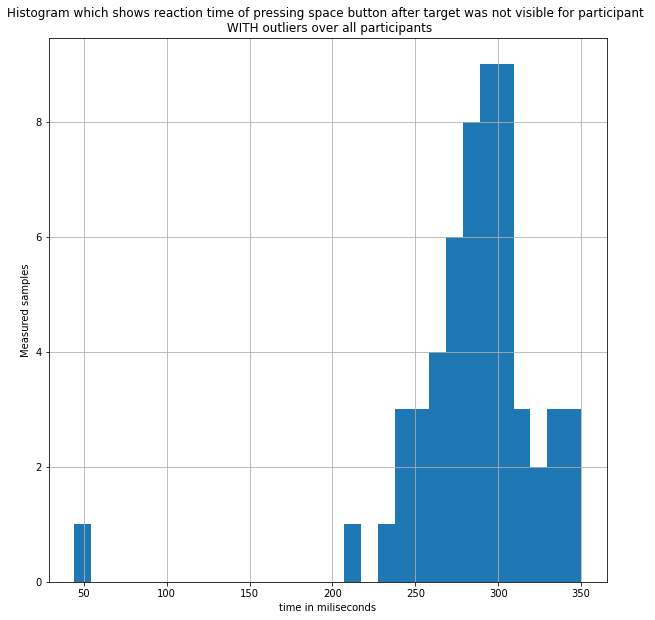

<Figure size 720x504 with 0 Axes>

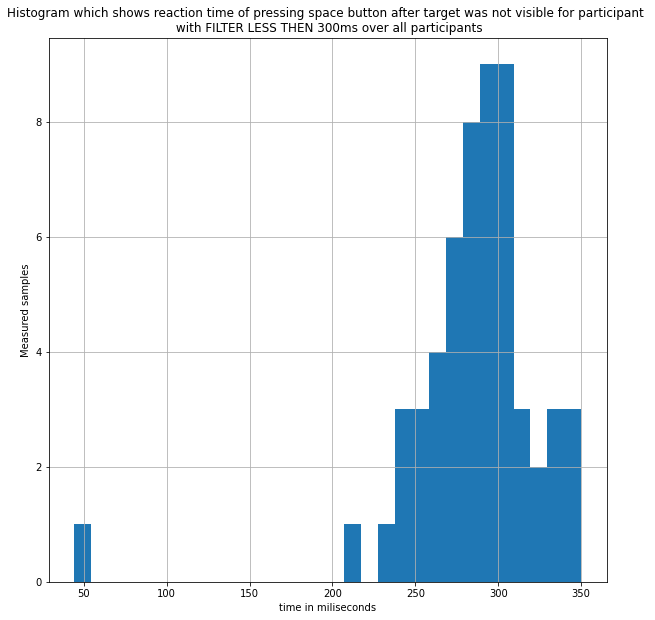

14


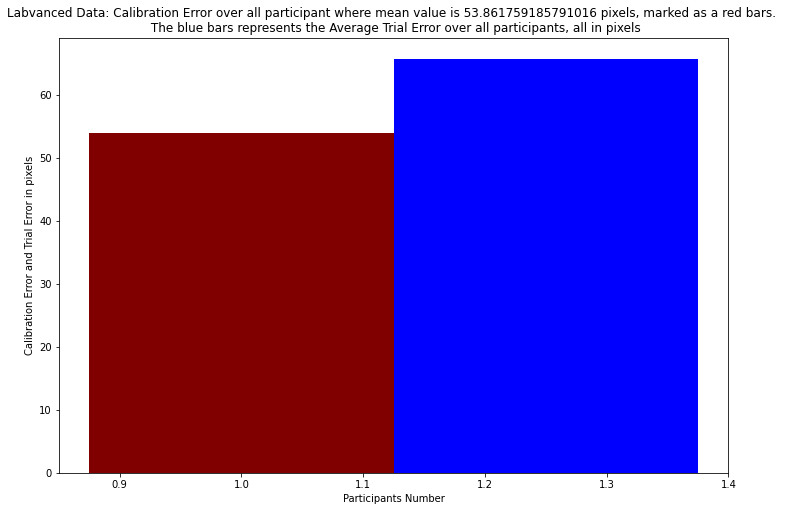

<Figure size 720x504 with 0 Axes>

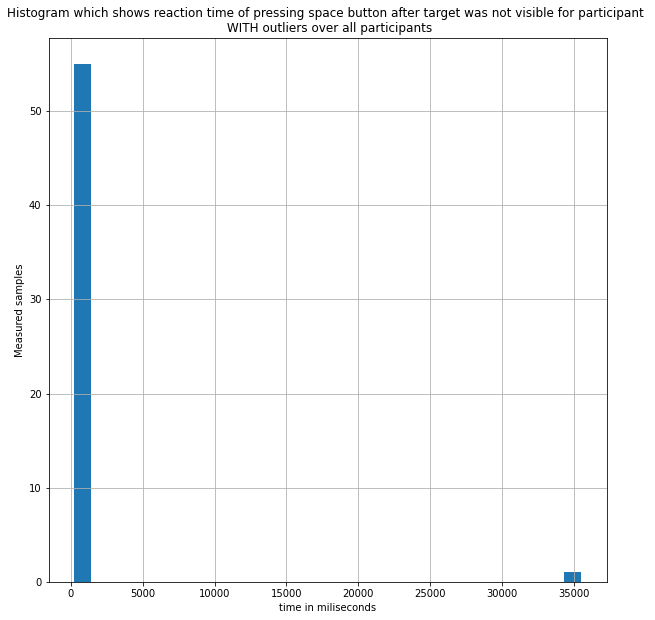

<Figure size 720x504 with 0 Axes>

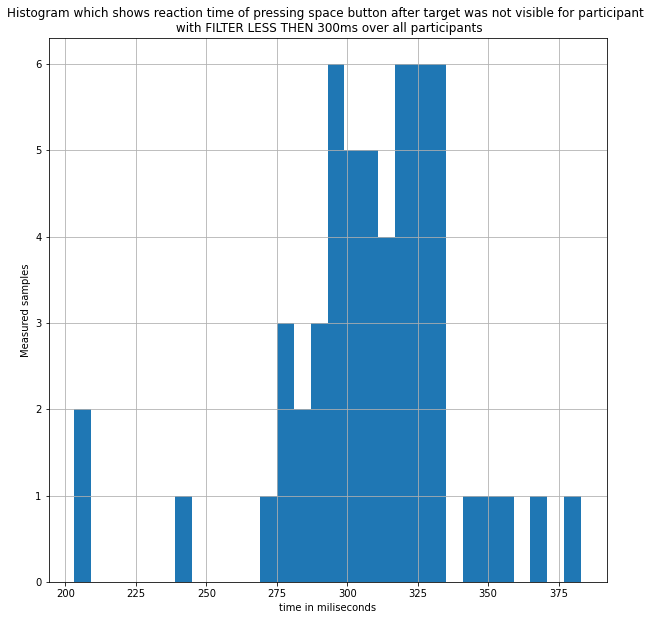

14


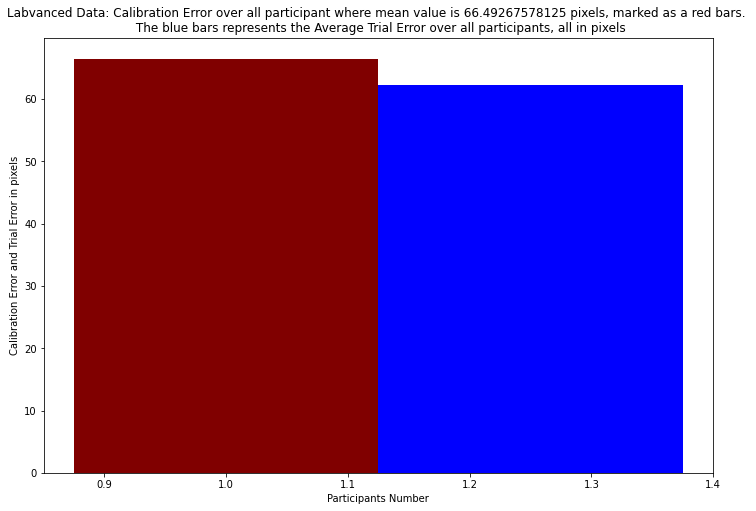

<Figure size 720x504 with 0 Axes>

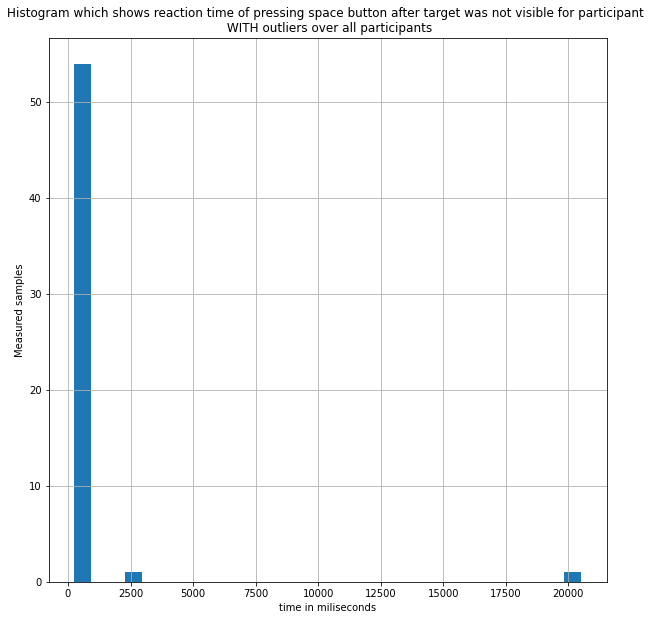

<Figure size 720x504 with 0 Axes>

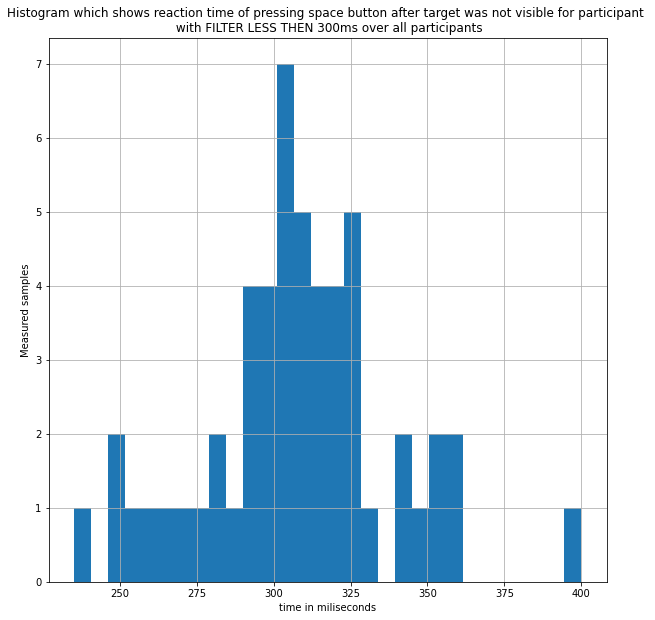

14


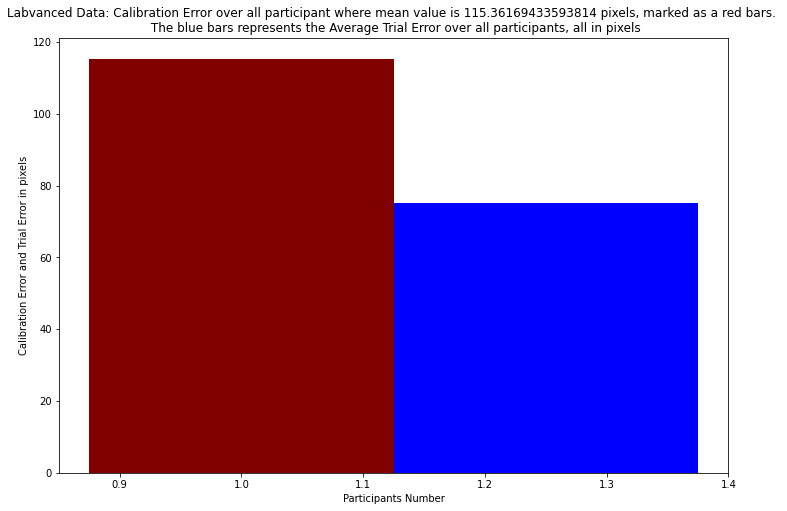

<Figure size 720x504 with 0 Axes>

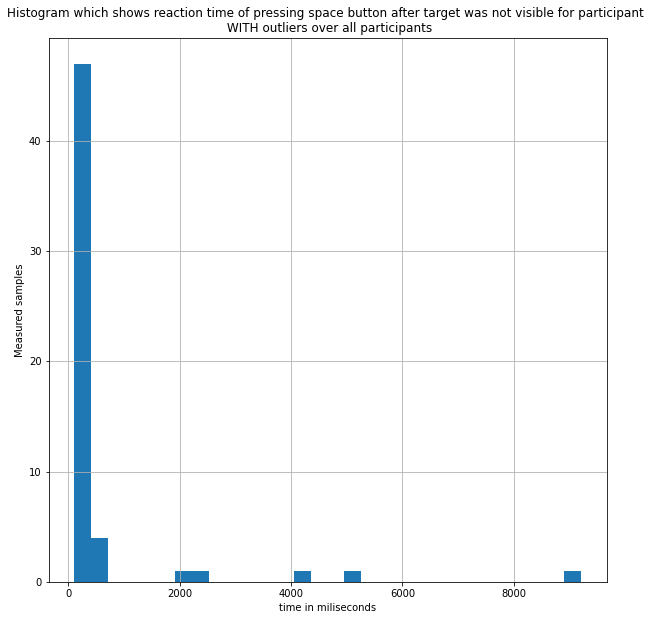

<Figure size 720x504 with 0 Axes>

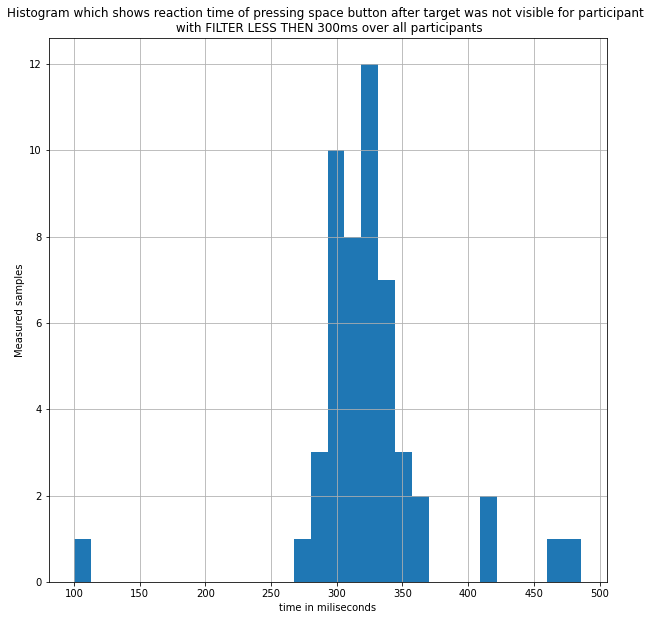

14


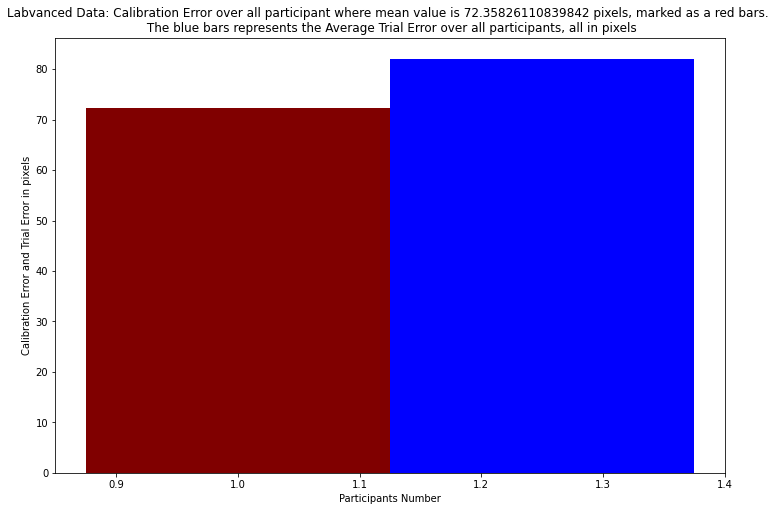

<Figure size 720x504 with 0 Axes>

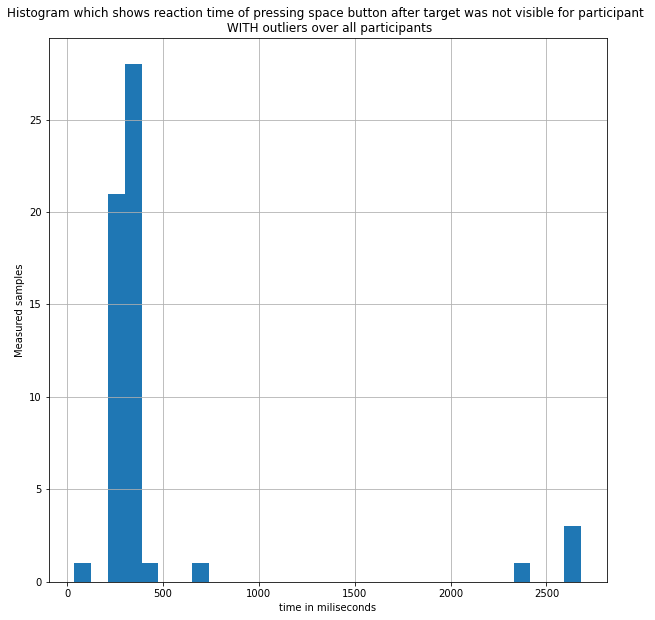

<Figure size 720x504 with 0 Axes>

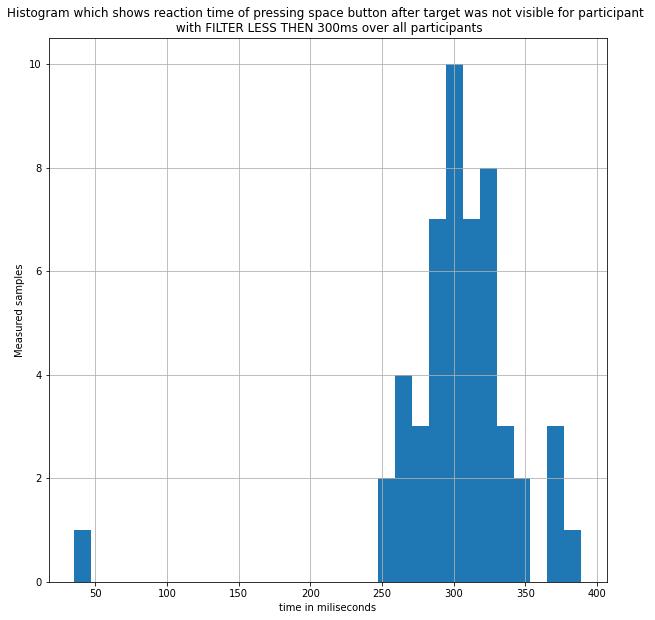

14


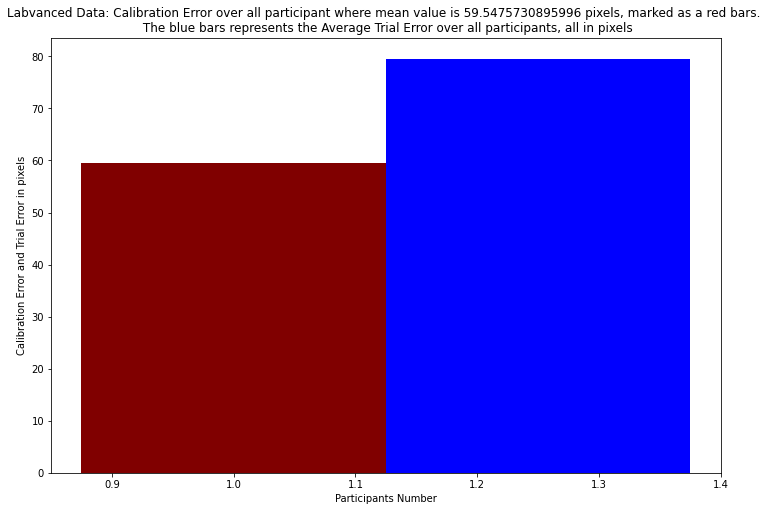

<Figure size 720x504 with 0 Axes>

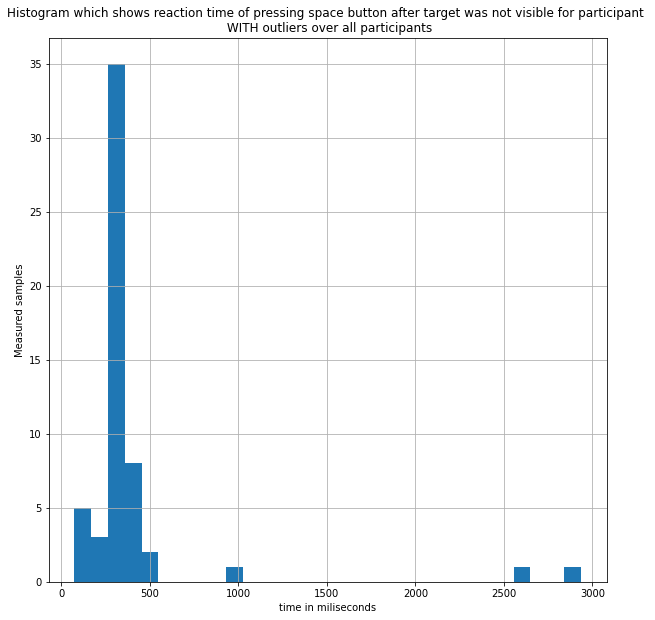

<Figure size 720x504 with 0 Axes>

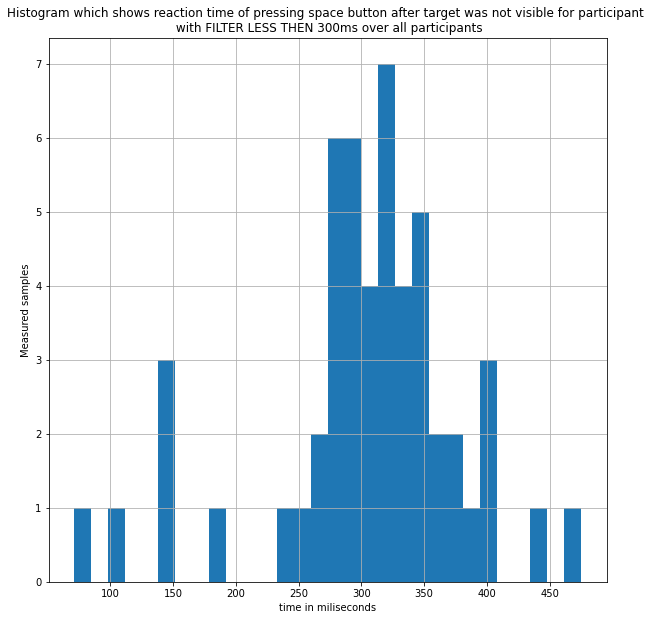

In [2]:
counter = 14
# for files in sorted(glob.glob("../../data/lb_data/trial_data/*.csv"),key=os.path.getmtime):
#     counter = counter + 1
#     print(counter)
for i in range(3,counter):
    all_lb = pd.read_csv('../../data/lb_data/trial_data/p' + str(i) + '_trials.csv')

    print(counter)
    all_lb = all_lb[all_lb['Task_Name'] == 'large_grid']
    all_lb = all_lb.reset_index()
    
    all_lb.calibration_error.unique()
    all_lb = all_lb.sort_values('StartFrame',ascending=True)
    cal_mean = all_lb.calibration_error.mean()
    # Calculate reaction time
    all_lb['reactionTimeCalc'] = abs(all_lb.random_target_duration - all_lb.reactionTime)
    all_lb
    
    trial_error = all_lb.groupby('Rec_Session_Id', as_index=False)['trial_error'].mean()
    trial_error
    
    participant_number = list(all_lb.Rec_Session_Id.unique())
    calib_error = list(all_lb.calibration_error.unique())
    trial_err = list(trial_error.trial_error.unique())

    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))

    br1 = np.arange(len(participant_number))+ 1
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # creating the bar plot
    plt.bar(br1, calib_error, color ='maroon',width = barWidth)
    plt.bar(br2, trial_err, color='blue', width = barWidth)

    plt.xlabel("Participants Number")
    plt.ylabel("Calibration Error and Trial Error in pixels")
    plt.title("Labvanced Data: Calibration Error over all participant where mean value is " + str(cal_mean)+ " pixels, marked as a red bars. \n The blue bars represents the Average Trial Error over all participants, all in pixels")
    plt.savefig('../calibrations_graphs/labvanced_calVsTrial_error.jpg')
    plt.show()
    data_time = all_lb[['reactionTimeCalc','Rec_Session_Id']]
    fig = plt.figure(figsize =(10, 7))
 
    # Creating axes instance
    # ax = fig.add_axes([0, 0, 1, 1])

    # Creating plot
    # bp = ax.boxplot(data_time, showfliers=False)
    bp = data_time.hist(column='reactionTimeCalc', bins=30, figsize=(10,10))

    # x-axis labels
    plt.ylabel("Measured samples")
    plt.xlabel("time in miliseconds")
    plt.title('Histogram which shows reaction time of pressing space button after target was not visible for participant \n WITH outliers over all participants')
    # show plot
    plt.savefig('../calibrations_graphs/labvanced_reaction_time_outliers.jpg')
    plt.show()
    
    data_time_restricted = pd.DataFrame()
    # Establish the reaction time threshold
    data_time_restricted = data_time[data_time['reactionTimeCalc'] <= 500]
    all_lb = all_lb[all_lb['reactionTimeCalc'] <= 500]
    
    fig = plt.figure(figsize =(10, 7)) 
    bp = data_time_restricted.hist(column='reactionTimeCalc', bins=30, figsize=(10,10))

    plt.ylabel("Measured samples")
    plt.xlabel("time in miliseconds")
    plt.title('Histogram which shows reaction time of pressing space button after target was not visible for participant \n with FILTER LESS THEN 300ms over all participants')
    # show plot
    plt.savefig('../calibrations_graphs/labvanced_data_after_300ms_reactionTime_treshold.jpg')
    plt.show()
    
    all_lb = all_lb.reset_index()
    all_lb = all_lb.drop(columns="level_0")
    all_lb.to_csv('../../data/lb_data/lb_trial_pp/p' + str(i) +'_trial_pp.csv')